In [1]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [4]:
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})


C:\Users\thiru\AppData\Local\Temp\ipykernel_13864\2684258997.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'male': 1, 'female': 0})


In [5]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [6]:
df['smoker'] = df['smoker'].replace({'yes':1,'no':0})

C:\Users\thiru\AppData\Local\Temp\ipykernel_13864\3492856528.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'yes':1,'no':0})


In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
oh = OneHotEncoder(sparse_output=False)
Std_sclr = StandardScaler()

In [9]:
encoded_region = oh.fit_transform(df[['region']])

# Convert to DataFrame for easy manipulation
encoded_df = pd.DataFrame(encoded_region, columns=oh.get_feature_names_out(['region']))

# Drop the original 'region' column
df = df.drop('region', axis=1)

# Concatenate the original DataFrame with the encoded columns
df = pd.concat([df, encoded_df], axis=1)

# Display the result
print(df)

      age  sex     bmi  children  smoker      charges  region_northeast  \
0      19    0  27.900         0       1  16884.92400               0.0   
1      18    1  33.770         1       0   1725.55230               0.0   
2      28    1  33.000         3       0   4449.46200               0.0   
3      33    1  22.705         0       0  21984.47061               0.0   
4      32    1  28.880         0       0   3866.85520               0.0   
...   ...  ...     ...       ...     ...          ...               ...   
1333   50    1  30.970         3       0  10600.54830               0.0   
1334   18    0  31.920         0       0   2205.98080               1.0   
1335   18    0  36.850         0       0   1629.83350               0.0   
1336   21    0  25.800         0       0   2007.94500               0.0   
1337   61    0  29.070         0       1  29141.36030               0.0   

      region_northwest  region_southeast  region_southwest  
0                  0.0               0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   float64
 7   region_northwest  1338 non-null   float64
 8   region_southeast  1338 non-null   float64
 9   region_southwest  1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


In [19]:
# Drop rows with missing values in X or y
df_cleaned = df.dropna(subset=['charges'])  # assuming 'charges' is the target column
X = df_cleaned.drop(columns='charges')
y = df_cleaned['charges']


In [20]:
X = Std_sclr.fit_transform(df)


In [23]:
print(y.shape)
print(X.shape)

(1338,)
(1338, 10)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    SVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor()
]

# Initialize an empty dictionary to store results
results = {}

# Loop through models
for model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)*100
    r2 = r2_score(y_test, y_pred)*100
    mae = mean_absolute_error(y_test, y_pred)*100
    

    
    # Store results in the dictionary
    results[model.__class__.__name__] = {
        'MSE': mse,
        'R2': r2,
        'MAE': mae
    }

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results).T

# Display the results
print(results_df)

                                MSE          R2           MAE
LinearRegression       9.783282e-21  100.000000  8.062433e-10
Ridge                  4.478408e+04   99.999712  1.526945e+03
Lasso                  1.663965e+02   99.999999  1.004091e+02
RandomForestRegressor  5.369303e+06   99.965415  4.490891e+03
AdaBoostRegressor      8.224745e+07   99.470221  7.164021e+04
SVR                    1.658095e+10   -6.802453  8.604177e+05
KNeighborsRegressor    1.504855e+09   90.306810  1.923200e+05
DecisionTreeRegressor  3.561345e+06   99.977060  5.754606e+03


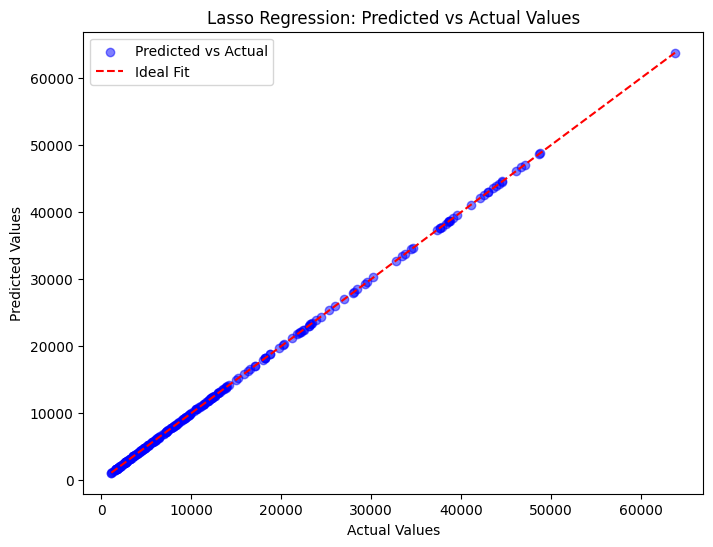

In [28]:
import matplotlib.pyplot as plt
lasso = Lasso()
lasso.fit(X_train, y_train)

# Predict on test data
y_pred = lasso.predict(X_test)

# Plotting predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Predicted vs Actual Values')
plt.legend()
plt.show()